In [4]:
using Gurobi, JuMP
using CSV, DataFrames

## Read CSV

In [6]:
data = CSV.read("sudoku_inputs.csv", DataFrame)
data

,row,col,val
,Int64,Int64,Int64
1,1,9,2
2,2,7,9
3,2,8,4
4,3,3,3
5,3,9,5
6,4,2,9
7,4,3,2
8,4,4,3
9,4,6,5


## Create model

In [8]:
model = Model(Gurobi.Optimizer)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-07


A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Gurobi

In [ ]:
## Variables
# Hint: you can make your variables Integer as follows:
# @variable(model, x[1:9, 1:9] ≥ 0, Int)
# Hint: you can make your variables Binary as follows:
# @variable(model, x[1:9, 1:9, 1:9] ≥ 0, Bin)
# What is the best representation? Depends on the sudoku-specific constraints below

In [ ]:
## Sudoku-specific constraints
# Hint: you should use the @constraint macro

In [9]:
## Given Sudoku inputs:
# Hint: you should use @constraint to constrain the entries in certain rows and columns to be equal to a value
for r in eachrow(data)
    println("row $(r.row) column $(r.col) has $(r.val)")
    # @constraint(model, ...)
end

row 1 column 9 has 2
row 2 column 7 has 9
row 2 column 8 has 4
row 3 column 3 has 3
row 3 column 9 has 5
row 4 column 2 has 9
row 4 column 3 has 2
row 4 column 4 has 3
row 4 column 6 has 5
row 4 column 8 has 7
row 4 column 9 has 4
row 5 column 1 has 8
row 5 column 2 has 4
row 6 column 2 has 6
row 6 column 3 has 7
row 6 column 5 has 9
row 6 column 6 has 8
row 7 column 4 has 7
row 7 column 6 has 6
row 8 column 4 has 9
row 8 column 8 has 2
row 9 column 1 has 4
row 9 column 3 has 8
row 9 column 4 has 5
row 9 column 7 has 3
row 9 column 8 has 6


### Model explanation

`TODO`: insert your explanation here.

## Solve model, read outputs

In [10]:
optimize!(model)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 0 rows, 0 columns and 0 nonzeros
Model fingerprint: 0xf9715da1
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  0.000000000e+00

User-callback calls 23, time in user-callback 0.00 sec


## Visualization

In [11]:
using Plots

In [42]:
function visualize_sudoku_inputs(
    data::DataFrame,
    ;
    show_solved_data::Bool = false,
    solved_data::Union{DataFrame, Nothing} = nothing,
)
    # data should be in the format provided in sudoku_inputs.csv
    # solved_data should be in the same format, but for non-provided inputs
    p = Plots.plot(
        xlim = (-0.5, 9.5), ylim = (-0.5, 9.5), 
        xaxis = false, yaxis = false,
        aspect_ratio = :equal,
    )
    for i in 0:9
        if i in [0, 3, 6, 9]
            lw = 2
        else
            lw = 1
        end
        Plots.plot!([i, i], [0, 9], label = false, color = :black, lw = lw)
        Plots.plot!([0, 9], [i, i], label = false, color = :black, lw = lw)
    end
    for r in eachrow(data)
        xpos = r.col - 0.5
        ypos = 9 - (r.row - 0.5)
        Plots.annotate!(xpos, ypos, text("$(r.val)", :black, :center, 10))
    end
    if show_solved_data
        for r in eachrow(solved_data)
            xpos = r.col - 0.5
            ypos = 9 - (r.row - 0.5)
            Plots.annotate!(xpos, ypos, text("$(r.val)", :blue, :center, 10))
        end
    end
    return p
end

visualize_sudoku_inputs (generic function with 1 method)

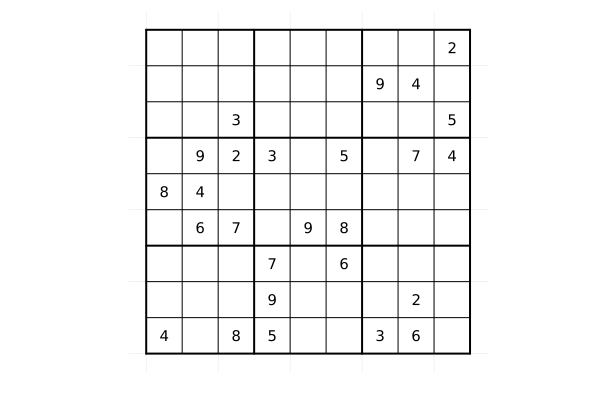

In [43]:
visualize_sudoku_inputs(data)

In [ ]:
# visualize your solution here:
# solved_data = ... # TODO
# visualize_sudoku_inputs(data, show_solved_data = true, solved_data = solved_data = solved_data)